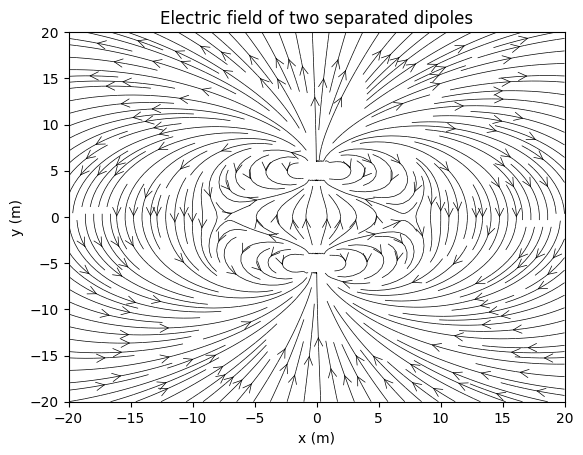

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid
x = np.linspace(-20, 20, 41)
y = np.linspace(-20, 20, 41)
X, Y = np.meshgrid(x, y)

# Define the charges
q1 = 1
q2 = -1
d = 10  # separation between dipoles

# Define the dipole moments
p1 = np.array([0, 0.5])
p2 = np.array([0, -0.5])

# Define the electric field function
def E_field(x, y):
    softening_parameter = 0.01   # Prevent divide by zero errors

    r1 = np.array([x, y]) - d/2 * np.array([0, 1])
    r2 = np.array([x, y]) + d/2 * np.array([0, 1])
    r1_norm = np.linalg.norm(r1) + softening_parameter**2
    r2_norm = np.linalg.norm(r2) + softening_parameter**2
    E1 = q1 * (3*r1.dot(p1)*r1/r1_norm**5 - p1/r1_norm**3)
    E2 = q2 * (3*r2.dot(p2)*r2/r2_norm**5 - p2/r2_norm**3)
    return E1 + E2

# Compute the electric field
def compute_E(X, Y):
    Ex, Ey = np.zeros_like(X), np.zeros_like(Y)
    for i in range(len(x)):
        for j in range(len(y)):
            E = E_field(x[i], y[j])
            Ex[j,i], Ey[j,i] = E
    return Ex, Ey

Ex, Ey = compute_E(X, Y)

# Plot the electric field
fig, ax = plt.subplots()
ax.streamplot(x, y, Ex, Ey, density=2, color='black', linewidth=0.5, arrowstyle='->', arrowsize=1.5)

# Add labels and title
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Electric field of two separated dipoles')

# Show the plot
plt.show()

[[ 6.63159332e-05  7.13965530e-05  7.66291484e-05 ... -7.66291484e-05
  -7.13965530e-05 -6.63159332e-05]
 [ 7.13755243e-05  7.73508180e-05  8.35959364e-05 ... -8.35959364e-05
  -7.73508180e-05 -7.13755243e-05]
 [ 7.65805645e-05  8.35671076e-05  9.09764757e-05 ... -9.09764757e-05
  -8.35671076e-05 -7.65805645e-05]
 ...
 [-7.65805645e-05 -8.35671076e-05 -9.09764757e-05 ...  9.09764757e-05
   8.35671076e-05  7.65805645e-05]
 [-7.13755243e-05 -7.73508180e-05 -8.35959364e-05 ...  8.35959364e-05
   7.73508180e-05  7.13755243e-05]
 [-6.63159332e-05 -7.13965530e-05 -7.66291484e-05 ...  7.66291484e-05
   7.13965530e-05  6.63159332e-05]]
[[ 6.63159332e-05  7.13965530e-05  7.66291484e-05 ... -7.66291484e-05
  -7.13965530e-05 -6.63159332e-05]
 [ 7.13755243e-05  7.73508180e-05  8.35959364e-05 ... -8.35959364e-05
  -7.73508180e-05 -7.13755243e-05]
 [ 7.65805645e-05  8.35671076e-05  9.09764757e-05 ... -9.09764757e-05
  -8.35671076e-05 -7.65805645e-05]
 ...
 [-7.65805645e-05 -8.35671076e-05 -9.0976475

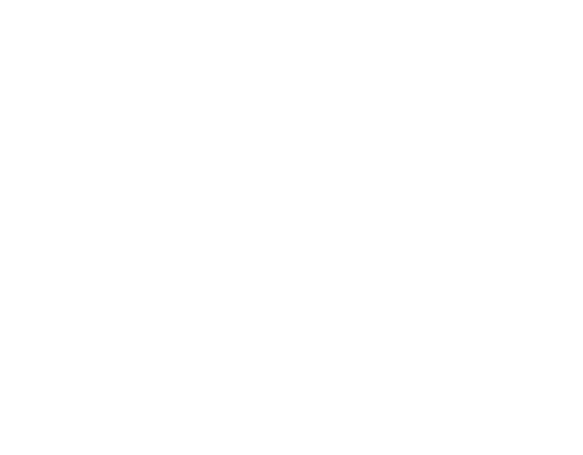

In [22]:
# import matplotlib.animation as animation

# Define the initial separation between dipoles
d0 = 1
d = d0

# Define the speed at which the dipoles are moving apart
v = 0.1
dt = 1

# Define the electric field function
def E_field(x, y):
    # Move dipoles distance d apart, d global parameter
    r1 = np.array([x, y]) - d/2 * np.array([0, 1])
    r2 = np.array([x, y]) + d/2 * np.array([0, 1])

    softening_parameter = 0.01   # Prevent divide by zero errors
    r1_norm = np.linalg.norm(r1) + softening_parameter**2
    r2_norm = np.linalg.norm(r2) + softening_parameter**2

    # Calculate Electric field due to each dipole
    E1 = q1 * (3*r1.dot(p1)*r1/r1_norm**5 - p1/r1_norm**3)
    E2 = q2 * (3*r2.dot(p2)*r2/r2_norm**5 - p2/r2_norm**3)
    return E1 + E2

def compute_E(X, Y):
    # Initialize arrays to store electric field vector at each point in grid
    Ex, Ey = np.zeros_like(X), np.zeros_like(Y)
    for i in range(len(x)):
        for j in range(len(y)):
            E = E_field(x[i], y[j])
            Ex[j,i], Ey[j,i] = E
    return Ex, Ey


# Define the update function for the animation
def update(frame):
    d = d0 + v * dt * frame  # Seperate dipoles by distance v*dt
    Ex, Ey = compute_E(X, Y)

    print(Ex)

    ax.clear()
    ax.streamplot(x, y, Ex, Ey, density=2, color='blue', linewidth=1.5, arrowstyle='->', arrowsize=1.5)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_title('Electric field of two moving dipoles (d={:.2f}m)'.format(d))
    return ax,

# Set up the figure and axis
fig, ax = plt.subplots()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=10, interval=1000, blit=True)

# Save the animation to a file
ani.save('dipole_field_animation_2.mp4', writer='ffmpeg')